Important Libraries

In [1]:
import os
import random
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from keras import Sequential

**Example images of dataset**

In [2]:
def display_images(path, title):
  file_list = os.listdir(path)
  print("Total Images are: ", len(file_list))
  fig = plt.figure(figsize = (10,5))
  for index in range(5):
    image_path = os.path.join(path, file_list[random.randint(0, len(file_list))])
    img = mpimg.imread(image_path)
    ax = fig.add_subplot(1, 5, index+1)
    ax.imshow(img)
    ax.axis('off')
  plt.suptitle(title)
  plt.show()

Total Images are:  690


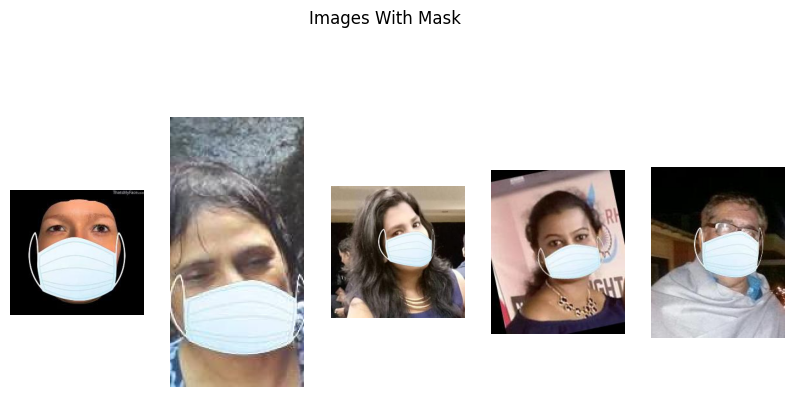

In [3]:
display_images("/content/drive/MyDrive/DataSet_ML/Covid-19-Multiclass-photos/with_mask","Images With Mask" )

Total Images are:  686


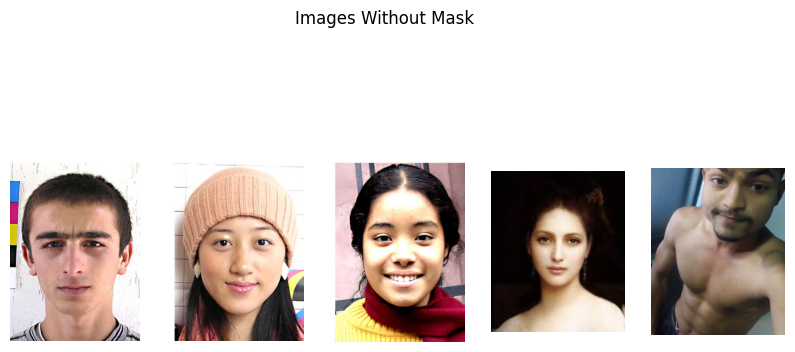

In [4]:
display_images("/content/drive/MyDrive/DataSet_ML/Covid-19-Multiclass-photos/without_mask","Images Without Mask" )

Class of dataset

In [5]:
# 0 = No mask
# 1 = Having mask
Categories = [0, 1]

Creating list of features and class for model training

In [6]:
data = []
initial_path = "/content/drive/MyDrive/DataSet_ML/Covid-19-Multiclass-photos"
next_path = os.listdir(initial_path)
for i,label in enumerate(Categories):
  final_path = os.path.join(initial_path, next_path[i])
  for file in os.listdir(final_path):
    img_path = os.path.join(final_path, file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224,224))
    data.append([img, label])

random.shuffle(data)


In [7]:
X = [] #Storing Images as features
Y = [] #Storing labels as 0, 1

for features, label in data:
  X.append(features)
  Y.append(label)
images = np.array(X)
images = images/255
labels = np.array(Y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state=42)

Using VGG16

In [9]:
vgg = VGG16()

In [10]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
#Removing last layer(Predictions) form VGG16
model = Sequential()
for layer in vgg.layers[:-1]:
  model.add(layer)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [13]:
#Make rest parameters as non trainable
for layer in model.layers:
  layer.trainable = False

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [15]:
#Adding our last denser layer
from keras.layers import Dense
model.add(Dense(1, activation = 'sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [17]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
model.fit(X_train, y_train, epochs = 5, validation_data=(X_test, y_test))

Epoch 1/5
35/35 [==============================] - 829s 24s/step - loss: 0.5821 - accuracy: 0.6991 - val_loss: 0.4324 - val_accuracy: 0.8442
Epoch 2/5
35/35 [==============================] - 816s 23s/step - loss: 0.3355 - accuracy: 0.9091 - val_loss: 0.3128 - val_accuracy: 0.8913
Epoch 3/5
35/35 [==============================] - 816s 23s/step - loss: 0.2618 - accuracy: 0.9218 - val_loss: 0.2275 - val_accuracy: 0.9457
Epoch 4/5
35/35 [==============================] - 813s 23s/step - loss: 0.2104 - accuracy: 0.9436 - val_loss: 0.2015 - val_accuracy: 0.9565
Epoch 5/5
35/35 [==============================] - 814s 23s/step - loss: 0.1753 - accuracy: 0.9536 - val_loss: 0.1766 - val_accuracy: 0.9601


Collab snipit for Using Camera

In [19]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg
1/1 [==============================] - 1s 1s/step
No Mask
Possibility of having mask [[8.6689404e-05]]


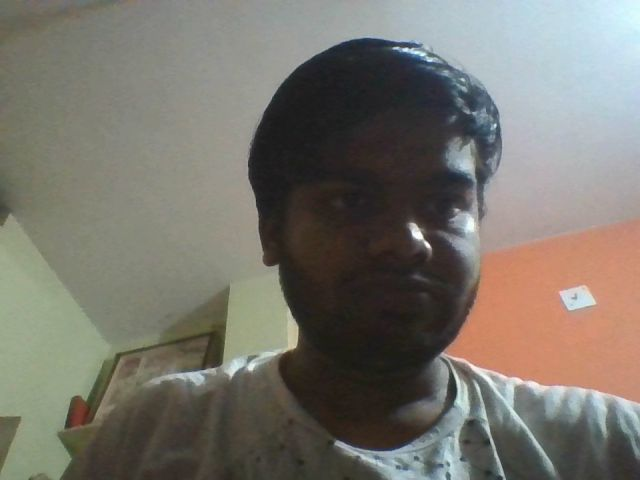

In [20]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  test = cv2.imread(filename)
  test = cv2.resize(test, (224,224))
  test = test.reshape((1, 224, 224, 3))
  predict = model.predict(test)
  if predict < 0.5:
    print("No Mask")
  else:
    print("With Mask")
  print("Possibility of having mask",predict)
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

Saved to photo.jpg
1/1 [==============================] - 1s 858ms/step
With Mask
Possibility of having mask [[0.9777662]]


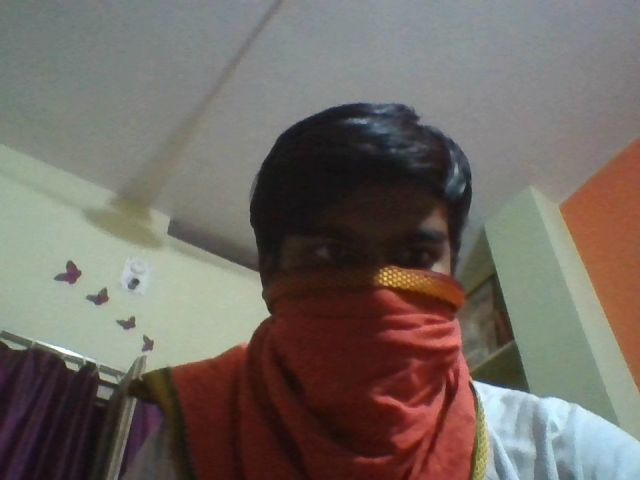

In [22]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  test = cv2.imread(filename)
  test = cv2.resize(test, (224,224))
  test = test.reshape((1, 224, 224, 3))
  predict = model.predict(test)
  if predict < 0.5:
    print("No Mask")
  else:
    print("With Mask")
  print("Possibility of having mask",predict)
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))